In [1]:
import networkx as nx
from cdt.causality.graph import PC
from cdt.data import load_dataset
import matplotlib.pyplot as plt

# Dataset of flow cytometry, real data, 11 variables x 7466 samples; 
# Sachs, K., Perez, O., Pe'er, D., Lauffenburger, D. A., & Nolan,
# G. P. (2005). Causal protein-signaling networks derived from
# multiparameter single-cell data. Science, 308(5721), 523-529.
data, graph = load_dataset("sachs")


No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [2]:
## Raw data

print(data.head(5))
data.to_csv("teste.csv")

   praf  pmek   plcg   PIP2   PIP3  p44/42  pakts473    PKA    PKC   P38  pjnk
0  26.4  13.2   8.82  18.30  58.80    6.61      17.0  414.0  17.00  44.9  40.0
1  35.9  16.5  12.30  16.80   8.13   18.60      32.5  352.0   3.37  16.5  61.5
2  59.4  44.1  14.60  10.20  13.00   14.90      32.5  403.0  11.40  31.9  19.5
3  73.0  82.8  23.10  13.50   1.29    5.83      11.8  528.0  13.70  28.6  23.1
4  33.7  19.8   5.19   9.73  24.80   21.10      46.1  305.0   4.66  25.7  81.3


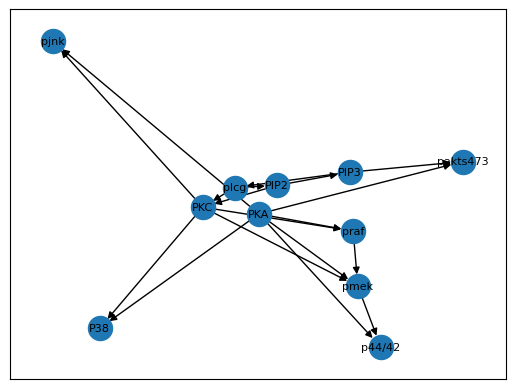

In [3]:
## Raw graph

nx.draw_networkx(graph, font_size=8)
plt.show()

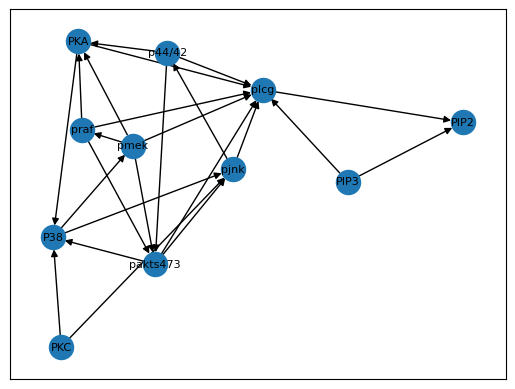

In [4]:
## PC processing

obj = PC()
#The predict() method works without a graph, or with a directed or undirected graph provided as an input

output = obj.predict(data)    #No graph provided as an argument
#output = obj.predict(data, nx.Graph(graph))  #With an undirected graph
#output = obj.predict(data, graph)  #With a directed graph
print("teste")

#To view the graph created, run the below commands:
nx.draw_networkx(output, font_size=8)
plt.show()

In [5]:
## Creates random matrix

import numpy as np
import pandas as pd
#df = pd.DataFrame(np.random.randint(0,7400,size=(7400, 15)), columns=list('ABCDEFGHIJKLKMN'))
df = pd.DataFrame(np.random.rand(7400,15), columns=list('ABCDEFGHIJKLKMN'))
print(df)

             A         B         C         D         E         F         G  \
0     0.753884  0.362687  0.001467  0.241859  0.285023  0.140111  0.964569   
1     0.092647  0.807164  0.896380  0.227682  0.448474  0.241883  0.188229   
2     0.211353  0.214912  0.682604  0.442475  0.332031  0.061590  0.364548   
3     0.175016  0.723442  0.015477  0.581565  0.300687  0.303537  0.773468   
4     0.642817  0.543460  0.230989  0.502159  0.332260  0.698821  0.411239   
...        ...       ...       ...       ...       ...       ...       ...   
7395  0.262693  0.839632  0.683562  0.529380  0.948774  0.631864  0.721360   
7396  0.295904  0.516919  0.234232  0.350093  0.023244  0.970539  0.122389   
7397  0.374056  0.498367  0.253078  0.462129  0.460899  0.458824  0.910598   
7398  0.124858  0.060525  0.167420  0.450059  0.657249  0.220916  0.620596   
7399  0.435852  0.423852  0.618223  0.016689  0.143410  0.107516  0.544939   

             H         I         J         K         L         

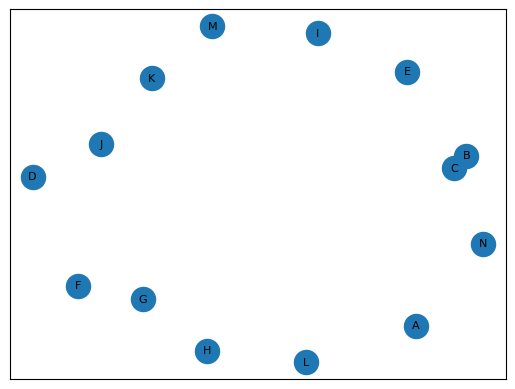

In [6]:
## Uses PC in the new graph

obj = PC()
#The predict() method works without a graph, or with a directed or undirected graph provided as an input

output = obj.predict(df)    #No graph provided as an argument
#output = obj.predict(data, nx.Graph(graph))  #With an undirected graph
#output = obj.predict(data, graph)  #With a directed graph

#To view the graph created, run the below commands:
nx.draw_networkx(output, font_size=8)
plt.show()

In [45]:
import numpy as np
#a = np.array([17.4, 17.2, 17.0, 16.9, 17.0, 17.4])
a = np.array([1,2,3,4,5,6,7,8,9,10])
b = np.abs(np.subtract.outer(a, a).T)
print(b)
print(type(b))

[[0 1 2 3 4 5 6 7 8 9]
 [1 0 1 2 3 4 5 6 7 8]
 [2 1 0 1 2 3 4 5 6 7]
 [3 2 1 0 1 2 3 4 5 6]
 [4 3 2 1 0 1 2 3 4 5]
 [5 4 3 2 1 0 1 2 3 4]
 [6 5 4 3 2 1 0 1 2 3]
 [7 6 5 4 3 2 1 0 1 2]
 [8 7 6 5 4 3 2 1 0 1]
 [9 8 7 6 5 4 3 2 1 0]]
<class 'numpy.ndarray'>


In [34]:
norm = np.linalg.norm(b)
b = b / norm

print(b)

[[0.         0.0246183  0.0492366  0.07385489 0.09847319 0.12309149
  0.14770979 0.17232809 0.19694639 0.22156468]
 [0.0246183  0.         0.0246183  0.0492366  0.07385489 0.09847319
  0.12309149 0.14770979 0.17232809 0.19694639]
 [0.0492366  0.0246183  0.         0.0246183  0.0492366  0.07385489
  0.09847319 0.12309149 0.14770979 0.17232809]
 [0.07385489 0.0492366  0.0246183  0.         0.0246183  0.0492366
  0.07385489 0.09847319 0.12309149 0.14770979]
 [0.09847319 0.07385489 0.0492366  0.0246183  0.         0.0246183
  0.0492366  0.07385489 0.09847319 0.12309149]
 [0.12309149 0.09847319 0.07385489 0.0492366  0.0246183  0.
  0.0246183  0.0492366  0.07385489 0.09847319]
 [0.14770979 0.12309149 0.09847319 0.07385489 0.0492366  0.0246183
  0.         0.0246183  0.0492366  0.07385489]
 [0.17232809 0.14770979 0.12309149 0.09847319 0.07385489 0.0492366
  0.0246183  0.         0.0246183  0.0492366 ]
 [0.19694639 0.17232809 0.14770979 0.12309149 0.09847319 0.07385489
  0.0492366  0.0246183  

In [38]:
# Creates Count Matrix using  line numbers from log lines as the counter
count_array = np.array([])
n = 2000
for i in range(n):
    count_array = np.append(count_array, i)
count_distance = np.subtract.outer(count_array, count_array).T
print("As dimensões da matriz de contadores são {}".format(count_distance.shape))

a = np.subtract.outer(count_distance, count_distance).T
# Using a Subtraction Distance using the line numbers as a Count Matrix
count_distance = np.abs(a)
# Normalizes Count Matrix with Min-Max
norm = np.linalg.norm(count_distance)
count_distance = count_distance/norm

As dimensões da matriz de contadores são (2000, 2000)


MemoryError: Unable to allocate 116. TiB for an array with shape (2000, 2000, 2000, 2000) and data type float64

In [101]:
# Creates blank matrix, the size of the previous one

#n = 2000

a_list = []
n = 2000
a = np.zeros(shape=(n, n), dtype=int)
for i in range(n):
        a_list.append(i)

#print(a_list)

count_array = np.array(a_list)
#print(count_array)

#tmp = np.array(tmp,dtype = 'object')

#print(a.shape) 

#count_array = np.array([])
#n = 10
#for i in range(n):
#        count_array = np.append(count_array, i)
#count_distance = np.subtract.outer(count_array, count_array).T
#print(count_array)
#count_array = count_array.astype(int)

import time

start = time.time()

for x in count_array:
  for y in count_array:
    a[x,y] = abs(x-y)

end = time.time()

print(end-start)
print(a)



1.6761422157287598
[[   0    1    2 ... 1997 1998 1999]
 [   1    0    1 ... 1996 1997 1998]
 [   2    1    0 ... 1995 1996 1997]
 ...
 [1997 1996 1995 ...    0    1    2]
 [1998 1997 1996 ...    1    0    1]
 [1999 1998 1997 ...    2    1    0]]


In [17]:
c = np.array([])
n = 10
for i in range(n):
    c = np.append(c, i)
print(c)
b = np.subtract.outer(c, c).T
print(b)
print(type(b))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]
 [-2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]
 [-3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-6. -5. -4. -3. -2. -1.  0.  1.  2.  3.]
 [-7. -6. -5. -4. -3. -2. -1.  0.  1.  2.]
 [-8. -7. -6. -5. -4. -3. -2. -1.  0.  1.]
 [-9. -8. -7. -6. -5. -4. -3. -2. -1.  0.]]
<class 'numpy.ndarray'>


In [4]:
import numpy as np
from sklearn.metrics import jaccard_score
y_true = np.array([[1, 1, 1],
                   [1, 1, 1]])
y_pred = np.array([[1, 1, 1],
                  [1, 1, 1]])
jaccard_score(y_true[0], y_pred[0])

def jaccard_score2(mat):
    cols_sum = mat.getnnz(axis=1)
    ab = mat * mat.T

    # for rows
    aa = np.repeat(cols_sum, ab.getnnz(axis=1))
    # for columns
    bb = cols_sum[ab.indices]

    similarities = ab.copy()
    similarities.data = (similarities.data) / (aa + bb - ab.data)

    return similarities

jaccard_score2(y_true)

AttributeError: 'numpy.ndarray' object has no attribute 'getnnz'

In [11]:
from scipy.sparse import random
from scipy import stats
from numpy.random import default_rng
rng = default_rng()
rvs = stats.poisson(25, loc=10).rvs
S = random(3, 4, density=0.25, random_state=rng, data_rvs=rvs)
S.A


array([[ 0., 34.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0., 34., 32.]])

In [26]:
from sklearn.metrics.pairwise import pairwise_distances 

T = S
#print(T.A)
HL = T.tolil()
HL[0,1] = 1
HL[1,1] = 1
HL[2,1] = 1
T = HL.tocsr() 
print(T.A)
print(jaccard_score2(T))
print(pairwise_distances(np.asarray(T.todense()), metric="jaccard", n_jobs=-1))


[[ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  1. 34. 32.]]
  (0, 2)	0.3333333333333333
  (0, 1)	1.0
  (0, 0)	1.0
  (1, 2)	0.3333333333333333
  (1, 1)	1.0
  (1, 0)	1.0
  (2, 2)	-1.0027586206896553
  (2, 1)	0.3333333333333333
  (2, 0)	0.3333333333333333
[[0.         0.         0.66666667]
 [0.         0.         0.66666667]
 [0.66666667 0.66666667 0.        ]]


c:\Users\vbert\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
